In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading data from C:\Users\Administrator\Desktop\Vinuwara_IRP_A.I.D.S_2024\Code\Dataset\WHO-COVID-19-global-daily-data.csv...
Original dataset shape: (445680, 8)


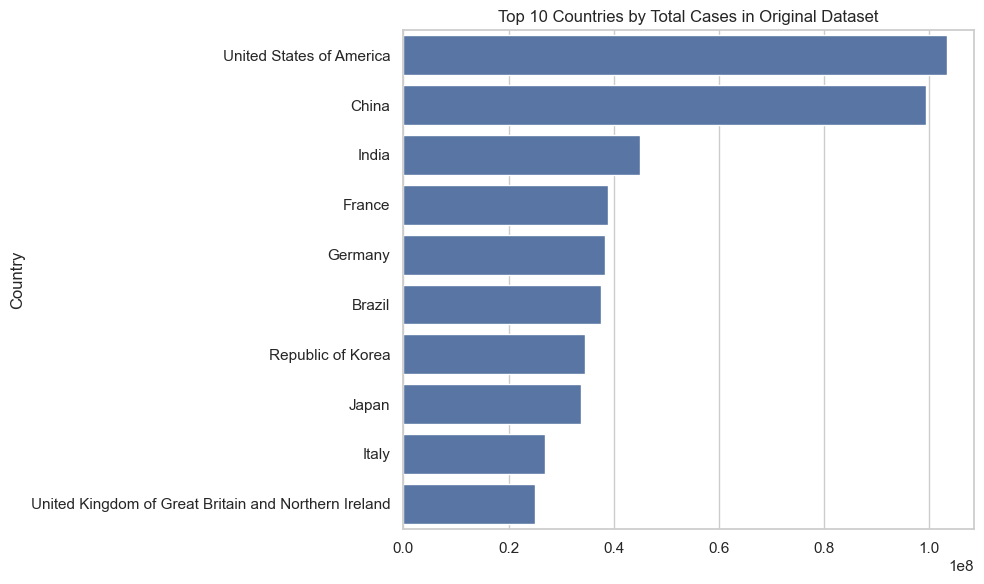

Found 1857 records for Sri Lanka


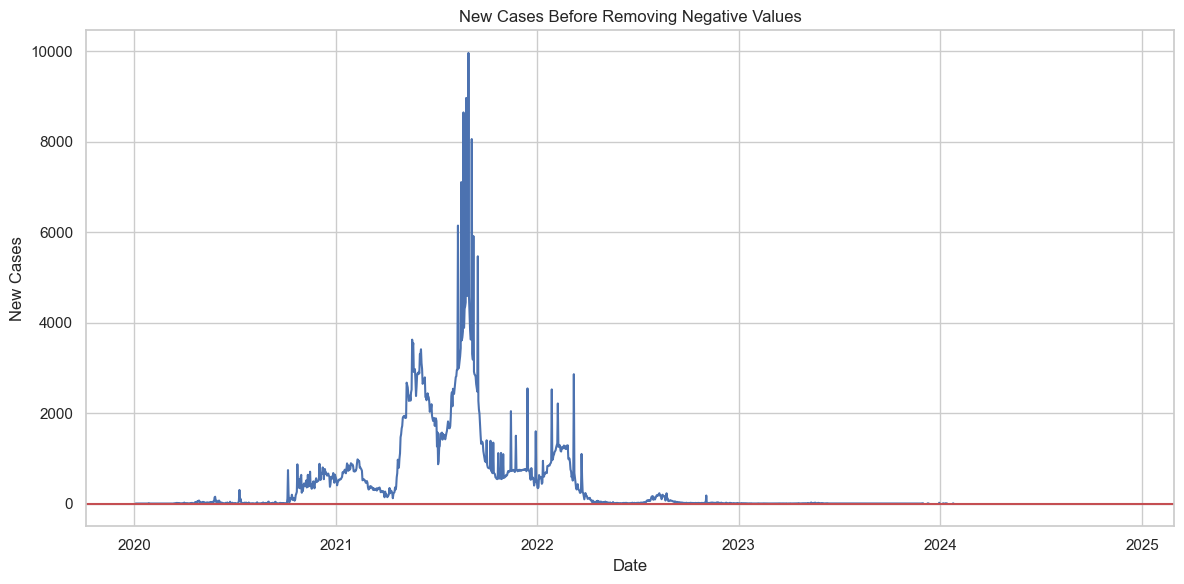

Found 3 negative values in New_cases
Found 1 negative values in New_deaths


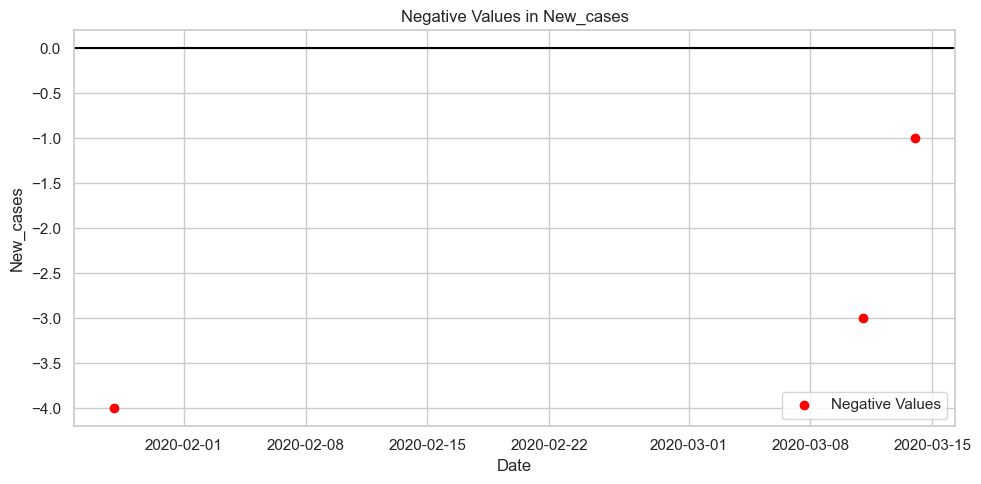

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13820\822663055.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sri_lanka_clean[col] = sri_lanka_clean[col].apply(lambda x: max(0, x))


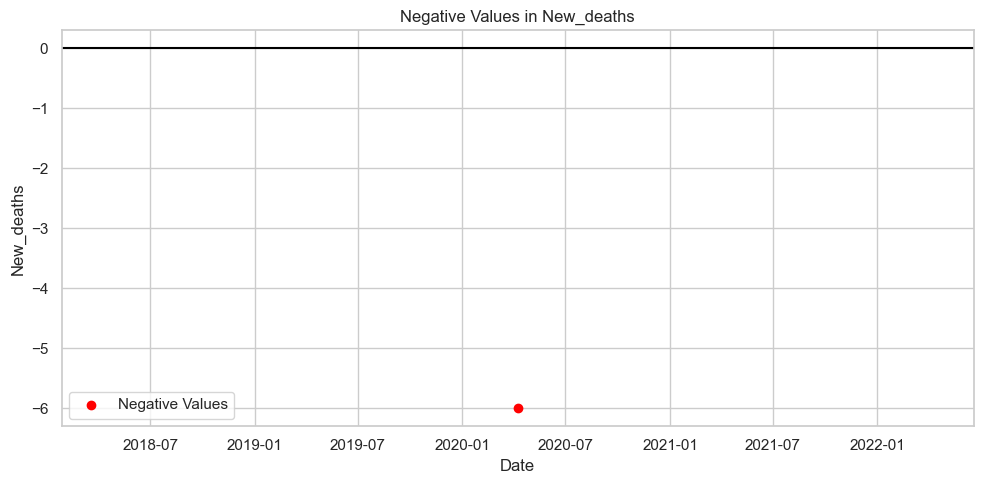

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13820\822663055.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sri_lanka_clean[col] = sri_lanka_clean[col].apply(lambda x: max(0, x))


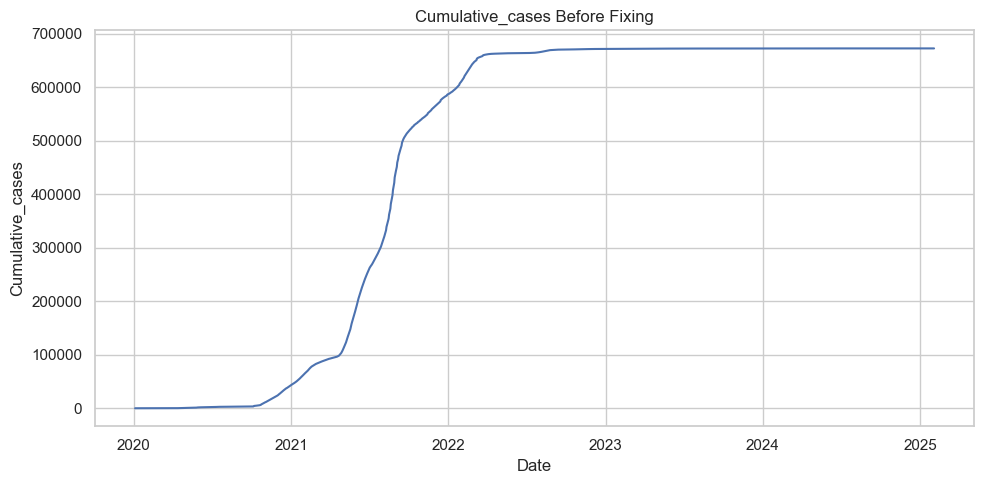

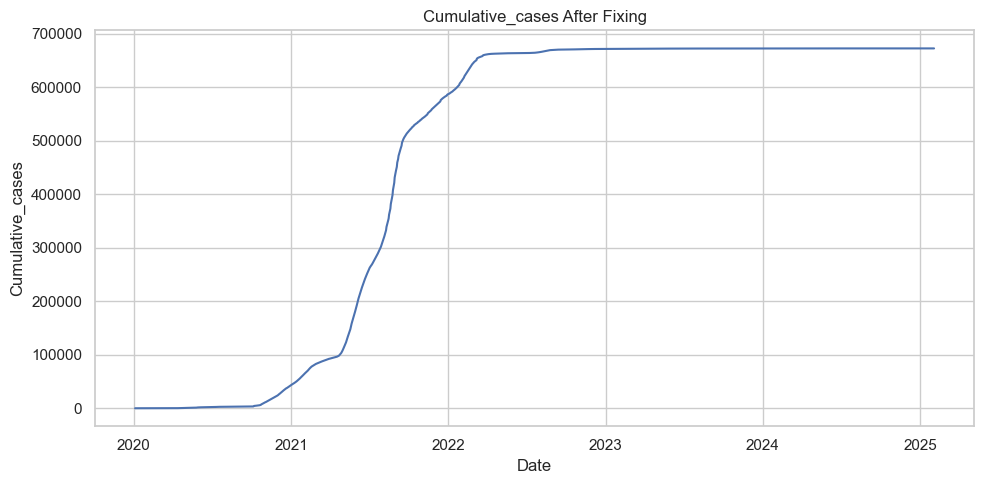

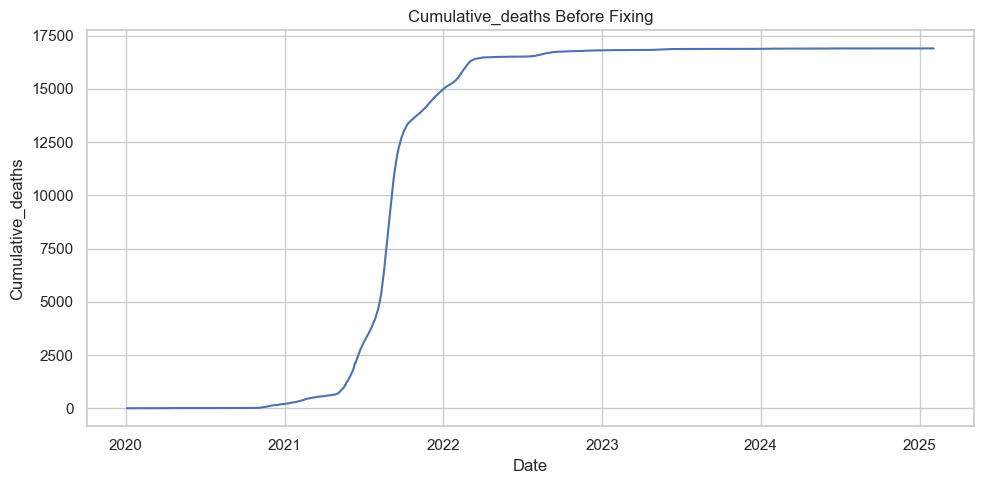

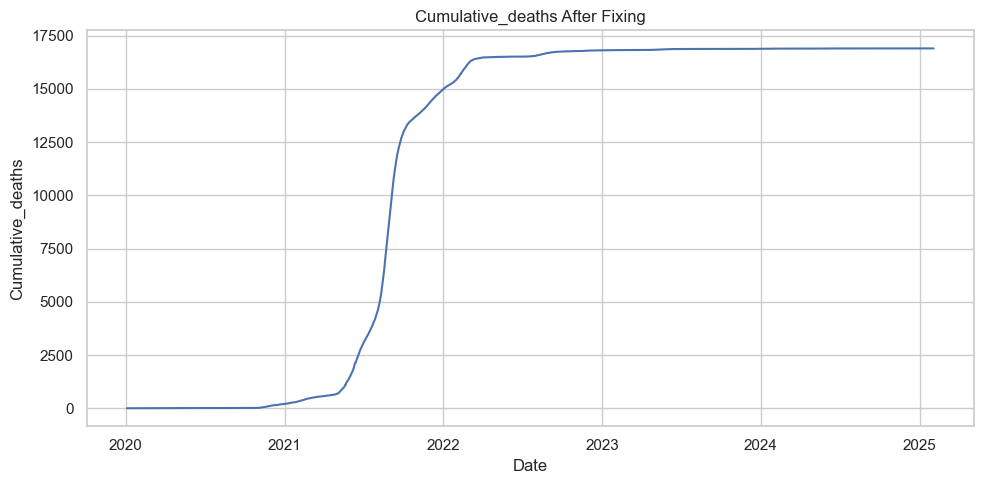

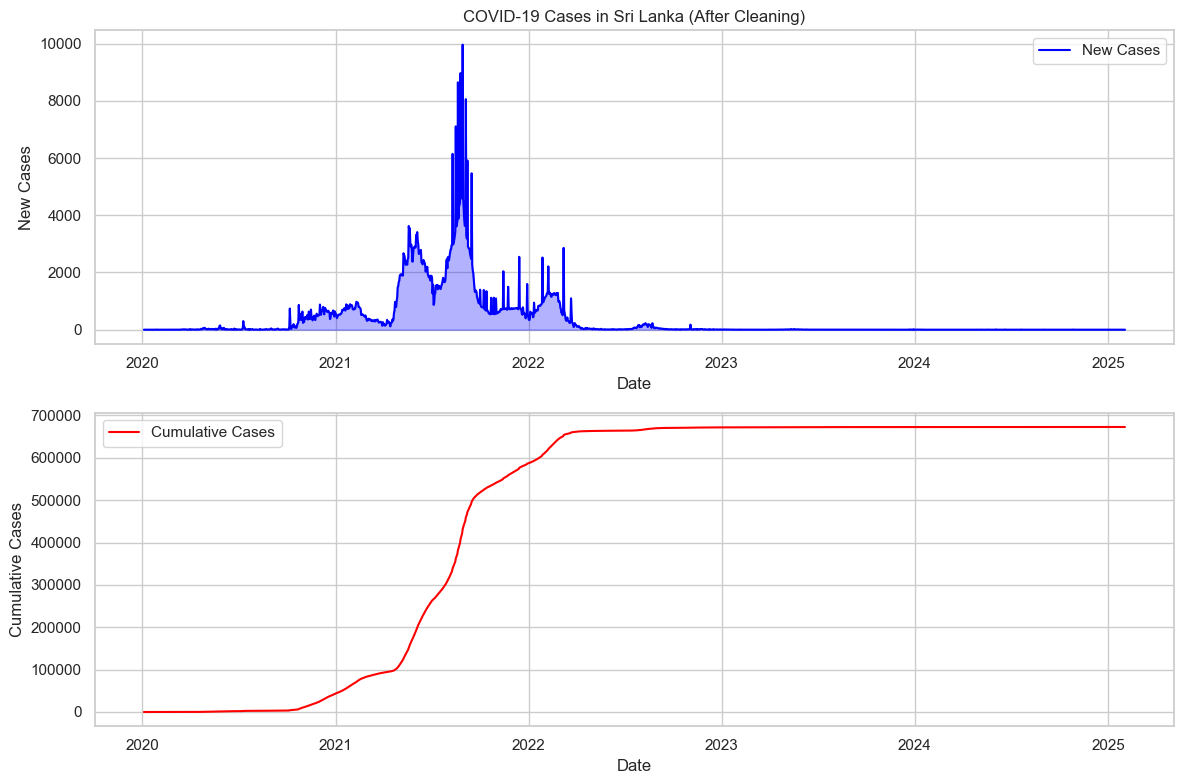

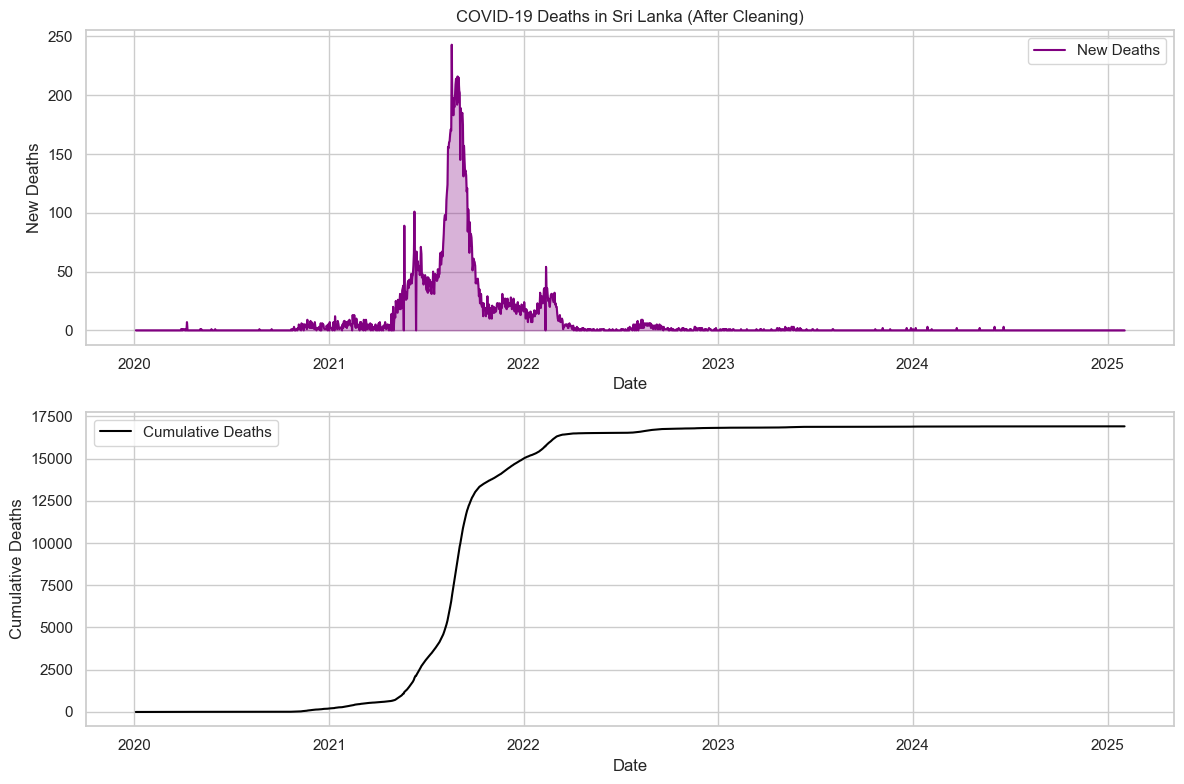

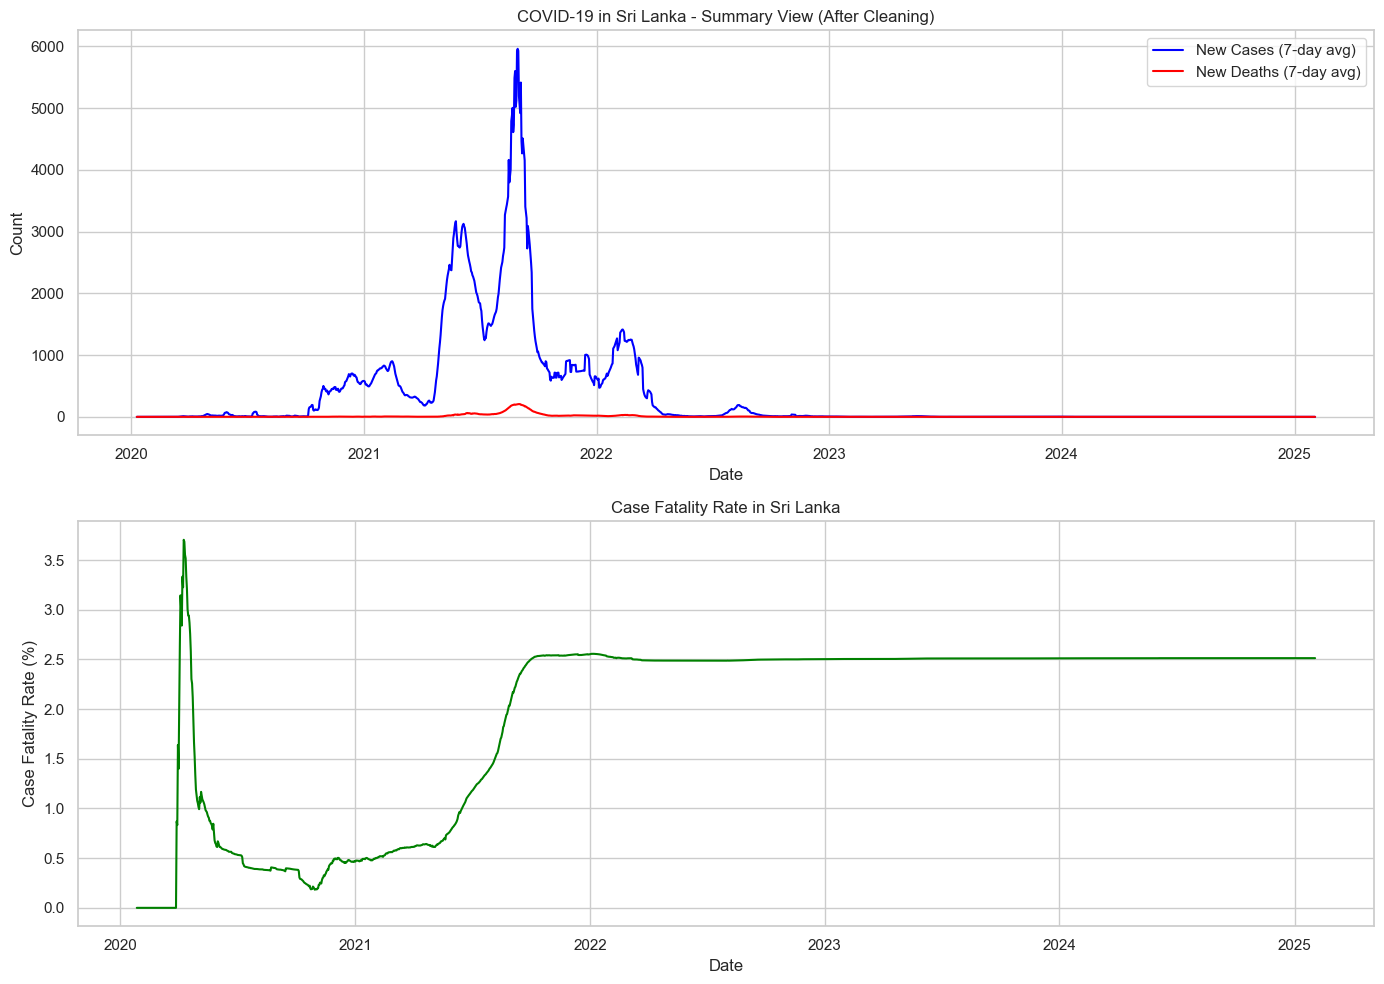

Sri Lanka COVID-19 data saved to sri_lanka_covid_data.csv

First 5 rows of the extracted data:
    Date_reported    Country Country_code  New_cases  Cumulative_cases  \
1      2020-01-04  Sri Lanka           LK        0.0                 0   
450    2020-01-05  Sri Lanka           LK        0.0                 0   
481    2020-01-06  Sri Lanka           LK        0.0                 0   
930    2020-01-07  Sri Lanka           LK        0.0                 0   
961    2020-01-08  Sri Lanka           LK        0.0                 0   

     New_deaths  Cumulative_deaths  New_cases_MA  New_deaths_MA  
1           0.0                  0           NaN            NaN  
450         0.0                  0           NaN            NaN  
481         0.0                  0           NaN            NaN  
930         0.0                  0           NaN            NaN  
961         0.0                  0           NaN            NaN  

Basic statistics of the extracted data:
         New_cases  Cum

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def extract_and_visualize_sri_lanka_covid_data(input_file, output_file='sri_lanka_covid_data.csv'):
    """
    Extract Sri Lanka COVID-19 data from WHO global daily data CSV file,
    remove negative values, and visualize the data at each step.
    
    Parameters:
    input_file (str): Path to the WHO COVID-19 global data CSV file
    output_file (str): Path to save the filtered data (default: 'sri_lanka_covid_data.csv')
    
    Returns:
    pandas.DataFrame: The filtered Sri Lanka data with negative values removed
    """
    # Set style for better visualizations
    sns.set(style="whitegrid")
    
    # Step 1: Load the CSV file
    print(f"Loading data from {input_file}...")
    df = pd.read_csv(input_file)
    
    # Visualize dataset overview
    print(f"Original dataset shape: {df.shape}")
    plt.figure(figsize=(10, 6))
    plt.title("Top 10 Countries by Total Cases in Original Dataset")
    top_countries = df.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False).head(10)
    sns.barplot(x=top_countries.values, y=top_countries.index)
    plt.tight_layout()
    plt.savefig('original_data_overview.png')
    plt.show()
    
    # Step 2: Filter for Sri Lanka data only
    sri_lanka_data = df[df['Country'].str.contains('Sri Lanka', case=False, na=False)]
    print(f"Found {len(sri_lanka_data)} records for Sri Lanka")
    
    # Step 3: Keep only essential columns
    essential_columns = [
        'Date_reported', 'Country', 'Country_code', 
        'New_cases', 'Cumulative_cases', 
        'New_deaths', 'Cumulative_deaths'
    ]
    
    # Keep only essential columns if they exist in the dataframe
    columns_to_keep = [col for col in essential_columns if col in sri_lanka_data.columns]
    sri_lanka_clean = sri_lanka_data[columns_to_keep]
    
    # Show data before removing negatives
    plt.figure(figsize=(12, 6))
    plt.title("New Cases Before Removing Negative Values")
    plt.plot(pd.to_datetime(sri_lanka_clean['Date_reported']), sri_lanka_clean['New_cases'], 'b-')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel('Date')
    plt.ylabel('New Cases')
    plt.tight_layout()
    plt.savefig('before_removing_negatives.png')
    plt.show()
    
    # Step 4: Count and report negative values before removing them
    numeric_columns = ['New_cases', 'New_deaths']
    neg_counts = {}
    
    for col in numeric_columns:
        if col in sri_lanka_clean.columns:
            neg_count = (sri_lanka_clean[col] < 0).sum()
            neg_counts[col] = neg_count
            print(f"Found {neg_count} negative values in {col}")
    
    # Replace negative values with 0 for New cases and New deaths
    for col in numeric_columns:
        if col in sri_lanka_clean.columns:
            # Visualize where the negatives are
            if neg_counts[col] > 0:
                plt.figure(figsize=(10, 5))
                plt.title(f"Negative Values in {col}")
                plt.scatter(
                    pd.to_datetime(sri_lanka_clean.loc[sri_lanka_clean[col] < 0, 'Date_reported']),
                    sri_lanka_clean.loc[sri_lanka_clean[col] < 0, col],
                    color='red', label='Negative Values'
                )
                plt.axhline(y=0, color='black', linestyle='-')
                plt.xlabel('Date')
                plt.ylabel(col)
                plt.legend()
                plt.tight_layout()
                plt.savefig(f'negative_{col}_points.png')
                plt.show()
            
            # Replace negatives with zeros
            sri_lanka_clean[col] = sri_lanka_clean[col].apply(lambda x: max(0, x))
    
    # Step 5: Fix cumulative columns to ensure they are monotonically increasing
    cumulative_columns = ['Cumulative_cases', 'Cumulative_deaths']
    
    for col in cumulative_columns:
        if col in sri_lanka_clean.columns:
            # Sort by date first to ensure proper cumulative calculation
            sri_lanka_clean = sri_lanka_clean.sort_values('Date_reported')
            
            # Visualize before fixing
            plt.figure(figsize=(10, 5))
            plt.title(f"{col} Before Fixing")
            plt.plot(pd.to_datetime(sri_lanka_clean['Date_reported']), sri_lanka_clean[col])
            plt.xlabel('Date')
            plt.ylabel(col)
            plt.tight_layout()
            plt.savefig(f'{col}_before_fixing.png')
            plt.show()
            
            # Fix cumulative columns to be monotonically increasing
            sri_lanka_clean[col] = sri_lanka_clean[col].cummax()
            
            # Visualize after fixing
            plt.figure(figsize=(10, 5))
            plt.title(f"{col} After Fixing")
            plt.plot(pd.to_datetime(sri_lanka_clean['Date_reported']), sri_lanka_clean[col])
            plt.xlabel('Date')
            plt.ylabel(col)
            plt.tight_layout()
            plt.savefig(f'{col}_after_fixing.png')
            plt.show()
    
    # Visualize corrected Sri Lanka data
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.title("COVID-19 Cases in Sri Lanka (After Cleaning)")
    plt.plot(pd.to_datetime(sri_lanka_clean['Date_reported']), sri_lanka_clean['New_cases'], label='New Cases', color='blue')
    plt.fill_between(pd.to_datetime(sri_lanka_clean['Date_reported']), sri_lanka_clean['New_cases'], alpha=0.3, color='blue')
    plt.xlabel('Date')
    plt.ylabel('New Cases')
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.plot(pd.to_datetime(sri_lanka_clean['Date_reported']), sri_lanka_clean['Cumulative_cases'], label='Cumulative Cases', color='red')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Cases')
    plt.legend()
    plt.tight_layout()
    plt.savefig('sri_lanka_cases_cleaned.png')
    plt.show()
    
    # Visualize deaths data
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.title("COVID-19 Deaths in Sri Lanka (After Cleaning)")
    plt.plot(pd.to_datetime(sri_lanka_clean['Date_reported']), sri_lanka_clean['New_deaths'], label='New Deaths', color='purple')
    plt.fill_between(pd.to_datetime(sri_lanka_clean['Date_reported']), sri_lanka_clean['New_deaths'], alpha=0.3, color='purple')
    plt.xlabel('Date')
    plt.ylabel('New Deaths')
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.plot(pd.to_datetime(sri_lanka_clean['Date_reported']), sri_lanka_clean['Cumulative_deaths'], label='Cumulative Deaths', color='black')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Deaths')
    plt.legend()
    plt.tight_layout()
    plt.savefig('sri_lanka_deaths_cleaned.png')
    plt.show()
    
    # Create a summary visualization
    plt.figure(figsize=(14, 10))
    
    # Moving average for smoothing the new cases and deaths curves
    window_size = 7  # 7-day moving average
    sri_lanka_clean['New_cases_MA'] = sri_lanka_clean['New_cases'].rolling(window=window_size).mean()
    sri_lanka_clean['New_deaths_MA'] = sri_lanka_clean['New_deaths'].rolling(window=window_size).mean()
    
    # Plot summary
    plt.subplot(2, 1, 1)
    plt.title("COVID-19 in Sri Lanka - Summary View (After Cleaning)")
    plt.plot(pd.to_datetime(sri_lanka_clean['Date_reported']), sri_lanka_clean['New_cases_MA'], 
             label='New Cases (7-day avg)', color='blue')
    plt.plot(pd.to_datetime(sri_lanka_clean['Date_reported']), sri_lanka_clean['New_deaths_MA'], 
             label='New Deaths (7-day avg)', color='red')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.legend()
    
    # Case fatality rate
    plt.subplot(2, 1, 2)
    plt.title("Case Fatality Rate in Sri Lanka")
    fatality_rate = (sri_lanka_clean['Cumulative_deaths'] / sri_lanka_clean['Cumulative_cases']) * 100
    plt.plot(pd.to_datetime(sri_lanka_clean['Date_reported']), fatality_rate, color='green')
    plt.xlabel('Date')
    plt.ylabel('Case Fatality Rate (%)')
    plt.tight_layout()
    plt.savefig('sri_lanka_summary_cleaned.png')
    plt.show()
    
    # Save to CSV
    sri_lanka_clean.to_csv(output_file, index=False)
    print(f"Sri Lanka COVID-19 data saved to {output_file}")
    
    return sri_lanka_clean

# Example usage
if __name__ == "__main__":
    # Replace 'who_covid_19_global.csv' with your actual file path
    data = extract_and_visualize_sri_lanka_covid_data(r'C:\Users\Administrator\Desktop\Vinuwara_IRP_A.I.D.S_2024\Code\Dataset\WHO-COVID-19-global-daily-data.csv')
    
    # Display the first few rows of the extracted data
    print("\nFirst 5 rows of the extracted data:")
    print(data.head())
    
    # Display basic statistics
    print("\nBasic statistics of the extracted data:")
    print(data.describe())